In [3]:
import os
import h5py

# Path to the download folder
download_folder = '/home/ravescovi/Downloads/Tomography/inputs'

# List all files in the download folder
files = os.listdir(download_folder)

# Filter out the h5 and hdf files
h5_files = [f for f in files if f.endswith('.h5') or f.endswith('.hdf')]

# Display the keys for each h5 file
for h5_file in h5_files:
    file_path = os.path.join(download_folder, h5_file)
    with h5py.File(file_path, 'r') as f:
        print(f"Keys in {h5_file}: {list(f.keys())}")

Keys in flat_00000.hdf: ['entry']
Keys in dark_00000.hdf: ['entry']
Keys in test_data_2.h5: ['defaults', 'exchange', 'measurement', 'process']
Keys in test_data_1.h5: ['exchange']


In [16]:
flat_file = os.path.join(download_folder, 'flat_00000.hdf')
dark_file = os.path.join(download_folder, 'dark_00000.hdf')
data_files = [os.path.join(download_folder, f) for f in h5_files if f.startswith('test_data')]

print("Flat file path:", flat_file)
print("Dark file path:", dark_file)
print("Data files paths:", data_files)

flat_images = h5py.File(flat_file, 'r')['entry']['data']['data']
darl_images = h5py.File(dark_file, 'r')['entry']['data']['data']

Flat file path: /home/ravescovi/Downloads/Tomography/inputs/flat_00000.hdf
Dark file path: /home/ravescovi/Downloads/Tomography/inputs/dark_00000.hdf
Data files paths: ['/home/ravescovi/Downloads/Tomography/inputs/test_data_2.h5', '/home/ravescovi/Downloads/Tomography/inputs/test_data_1.h5']


In [31]:
print(data_images.keys())
print(data_images['data_white'])

<KeysViewHDF5 ['data', 'data2', 'data_dark', 'data_white', 'theta']>
<HDF5 dataset "data_white": shape (20, 22, 1536), type "<u2">


In [35]:
##test recon1
import tomopy

data_images = h5py.File(data_files[0], 'r')['exchange']


angles = data_images['theta']
dark = data_images['data_dark']
flat = data_images['data_white']
data = data_images['data']

print(angles.shape)
print(dark.shape)
print(flat.shape)  
print(data.shape)


(720,)
(10, 22, 1536)
(20, 22, 1536)
(720, 22, 1536)


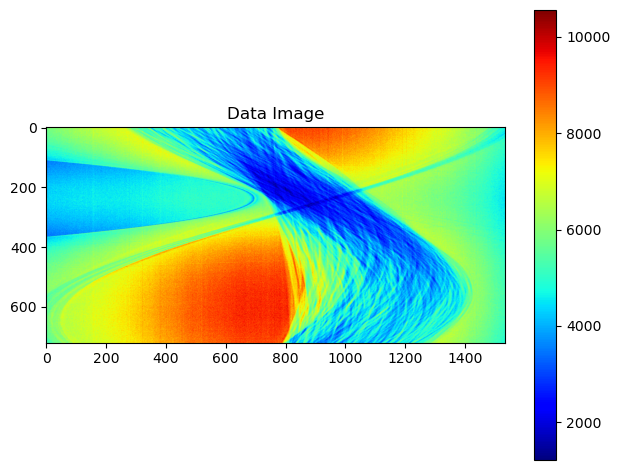

In [37]:
import matplotlib.pyplot as plt

# Plot data image
plt.imshow(data[:,0,:], cmap='jet')
plt.title('Data Image')
plt.colorbar()

plt.tight_layout()
plt.show()